In [1]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# stop fuzzy charts
%config InlineBackend.figure_format = "retina"

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ='all'

Data for this projet was sourced from CSO: https://www.cso.ie/en/statistics/

- The fertiziler data was collected https://data.cso.ie/table/AJM05 ranging from Jan 1980 - Feb 2022

I wanted to look at what makes up fertilizer to see prices for materials also went up. 
Data for potassium chloride was collected from 
https://www.indexmundi.com/commodities/?commodity=potassium-chloride&months=240&currency=eur
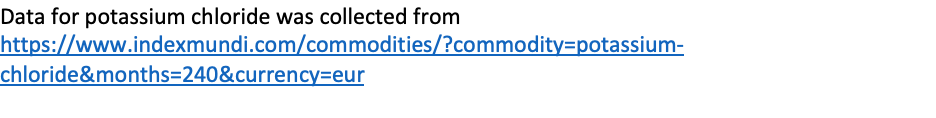

fertiliser consumption in the EU
https://ec.europa.eu/eurostat/databrowser/view/AEI_FM_USEFERT__custom_286880/bookmark/table?lang=en&bookmarkId=05eb8b63-b750-4adf-88ca-f6232e9cbbb9

In [5]:
#import datasets
df_fertiliser = pd.read_csv("../data/fertiliser_price.csv")   #fertilizer
df_milk = pd.read_csv("../data/milk_price.csv")               #fertilizer
#what makes up the fertisiler
df_potassium = pd.read_csv("../data/potassium_chloride_price.csv")   #potassium_chloride_price
df_phosphate = pd.read_csv("../data/rock_phosphate_price.csv")   #phosphate_price

#fertiliser_consumption_eu
df_consum_eu = pd.read_csv("../data/fertiliser_consumption_eu.csv")   #fertilizer

#tweets
df_tweets= pd.read_csv("../data/farmtweets.csv")   #farm tweets

In [6]:
# check the dtypes
df_fertiliser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12144 entries, 0 to 12143
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Statistic           12144 non-null  object
 1   Month               12144 non-null  object
 2   Type of Fertiliser  12144 non-null  object
 3   UNIT                12144 non-null  object
 4   VALUE               6979 non-null   object
dtypes: object(5)
memory usage: 474.5+ KB


In [7]:
# check the data
df_fertiliser['Type of Fertiliser'].unique()

array(['Calcium Ammonium Nitrate (27.5% N)', 'Urea (46% N)',
       'Granular Superphosphate (16% P)', 'Muriate of Potash (50% K)',
       'Compound 0-10-20', 'Compound 0-7-30', 'Compound 7-6-17',
       'Compound 10-10-20', 'Compound 14-7-14', 'Compound 18-6-12',
       'Compound 24-2.5-10', 'Compound 27-2.5-5',
       'Sulphate of Potash (42% K)', 'Compound 8-5-18',
       'Compound 20-4-10', 'Sulphate of Ammonia (21%)',
       'Ammonium Sulphate Nitrate (26%)', 'Compound 10-5-25',
       'Compound 13-6-20', 'Compound 15-3-20', 'Compound 24-2.2-10',
       'Compound 24-2.2-4.5', 'Compound 19-0-15', 'Compound 25-4-0'],
      dtype=object)

In [8]:
# make type categorical
df_fertiliser['Type of Fertiliser'] = df_fertiliser['Type of Fertiliser'].astype("category")

In [9]:
#removing the M and replacing with the -
df_fertiliser['Month'] = df_fertiliser['Month'].str.replace("M", "-")

In [10]:
# date format
df_fertiliser['Month'] = pd.to_datetime(df_fertiliser['Month'], format='%Y-%m')

In [11]:
df_fertiliser['month_year'] = pd.to_datetime(df_fertiliser['Month']).dt.to_period('M')
df_fertiliser['month'] = pd.DatetimeIndex(df_fertiliser['Month']).month
df_fertiliser['year'] = pd.DatetimeIndex(df_fertiliser['Month']).year

In [12]:
# check the dtypes
df_fertiliser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12144 entries, 0 to 12143
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Statistic           12144 non-null  object        
 1   Month               12144 non-null  datetime64[ns]
 2   Type of Fertiliser  12144 non-null  category      
 3   UNIT                12144 non-null  object        
 4   VALUE               6979 non-null   object        
 5   month_year          12144 non-null  period[M]     
 6   month               12144 non-null  int64         
 7   year                12144 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(2), object(3), period[M](1)
memory usage: 676.8+ KB


There is missing data on the VALUE column

One of the values was showing '.' instead of a number and it was making it diffcult to convert into a numeric value going to change it to NA for now

In [13]:
df_fertiliser.VALUE = df_fertiliser.VALUE.replace('.', np.nan)

In [14]:
df_fertiliser.VALUE == "."

0        False
1        False
2        False
3        False
4        False
         ...  
12139    False
12140    False
12141    False
12142    False
12143    False
Name: VALUE, Length: 12144, dtype: bool

In [15]:
# convert to a numeric value
df_fertiliser['VALUE'] = pd.to_numeric(df_fertiliser['VALUE'])

In [16]:
# summary statistics
df_fertiliser.describe()

,VALUE,month,year
count,6557.000000,12144.000000,12144.000000
mean,288.982767,6.480237,2000.584980
std,114.851093,3.459763,12.172429
min,109.000000,1.000000,1980.000000
25%,196.000000,3.000000,1990.000000
50%,245.000000,6.000000,2001.000000
75%,378.000000,9.000000,2011.000000
max,939.000000,12.000000,2022.000000


In [17]:
#filtering to a specific type
df_com15 = df_fertiliser[df_fertiliser['Type of Fertiliser']=='Compound 15-3-20']
df_com15

,Statistic,Month,Type of Fertiliser,UNIT,VALUE,month_year,month,year
19,Fertiliser Price,1980-01-01,Compound 15-3-20,Euro per Tonne,NaN,1980-01,1,1980
43,Fertiliser Price,1980-02-01,Compound 15-3-20,Euro per Tonne,NaN,1980-02,2,1980
67,Fertiliser Price,1980-03-01,Compound 15-3-20,Euro per Tonne,NaN,1980-03,3,1980
91,Fertiliser Price,1980-04-01,Compound 15-3-20,Euro per Tonne,NaN,1980-04,4,1980
115,Fertiliser Price,1980-05-01,Compound 15-3-20,Euro per Tonne,NaN,1980-05,5,1980
...,...,...,...,...,...,...,...,...
12043,Fertiliser Price,2021-10-01,Compound 15-3-20,Euro per Tonne,NaN,2021-10,10,2021
12067,Fertiliser Price,2021-11-01,Compound 15-3-20,Euro per Tonne,NaN,2021-11,11,2021
12091,Fertiliser Price,2021-12-01,Compound 15-3-20,Euro per Tonne,NaN,2021-12,12,2021
12115,Fertiliser Price,2022-01-01,Compound 15-3-20,Euro per Tonne,764.0,2022-01,1,2022


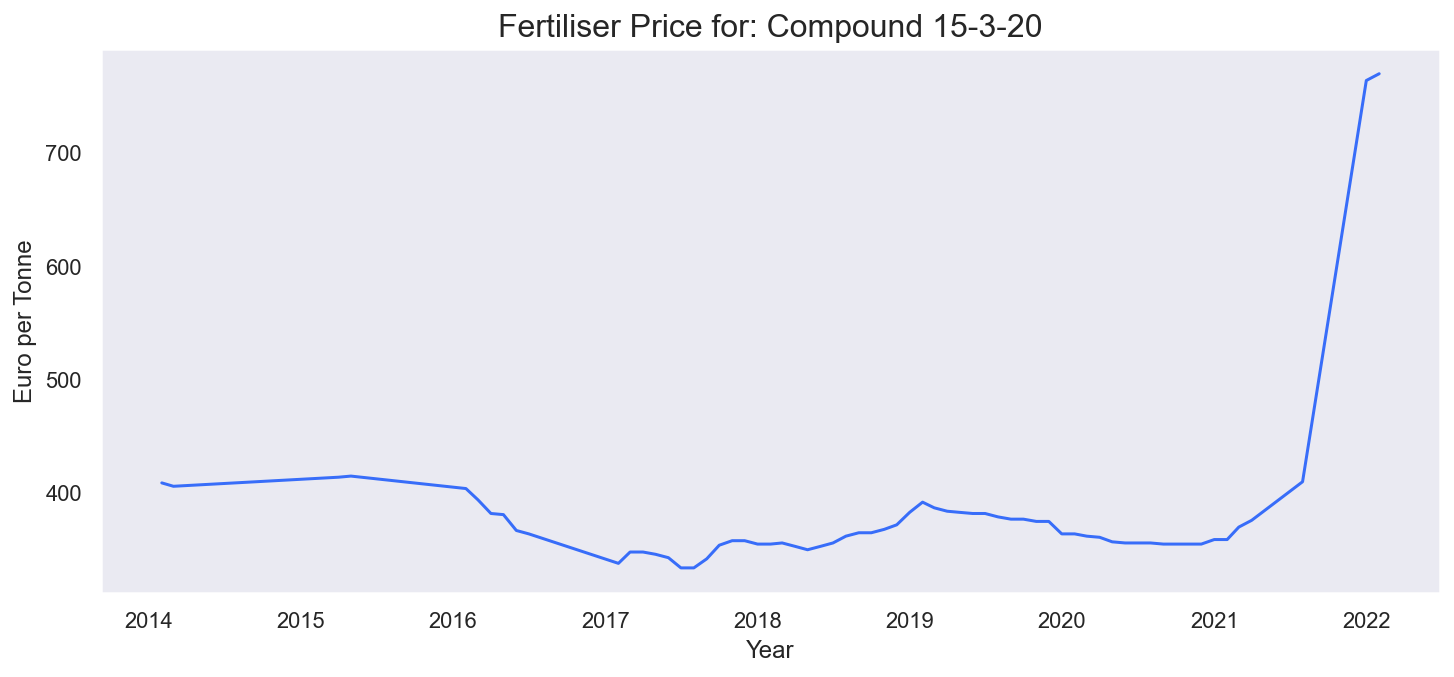

In [18]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(12, 5));  

# remove the grid on the chart
sns.set_style( {'axes.grid' : False})


# plotting month and IN, groupby if it is a bankholiday
sns.lineplot(data = df_com15, x="Month", y="VALUE");


#title
plt.title("Fertiliser Price for: Compound 15-3-20", fontsize = 16);

plt.ylabel('Euro per Tonne');
plt.xlabel('Year');

plt.show();

In [19]:
#filtering to a specific type
df_com18612 = df_fertiliser[df_fertiliser['Type of Fertiliser']=='Compound 18-6-12']
df_com18612

,Statistic,Month,Type of Fertiliser,UNIT,VALUE,month_year,month,year
9,Fertiliser Price,1980-01-01,Compound 18-6-12,Euro per Tonne,157.0,1980-01,1,1980
33,Fertiliser Price,1980-02-01,Compound 18-6-12,Euro per Tonne,159.0,1980-02,2,1980
57,Fertiliser Price,1980-03-01,Compound 18-6-12,Euro per Tonne,161.0,1980-03,3,1980
81,Fertiliser Price,1980-04-01,Compound 18-6-12,Euro per Tonne,163.0,1980-04,4,1980
105,Fertiliser Price,1980-05-01,Compound 18-6-12,Euro per Tonne,164.0,1980-05,5,1980
...,...,...,...,...,...,...,...,...
12033,Fertiliser Price,2021-10-01,Compound 18-6-12,Euro per Tonne,499.0,2021-10,10,2021
12057,Fertiliser Price,2021-11-01,Compound 18-6-12,Euro per Tonne,505.0,2021-11,11,2021
12081,Fertiliser Price,2021-12-01,Compound 18-6-12,Euro per Tonne,593.0,2021-12,12,2021
12105,Fertiliser Price,2022-01-01,Compound 18-6-12,Euro per Tonne,707.0,2022-01,1,2022


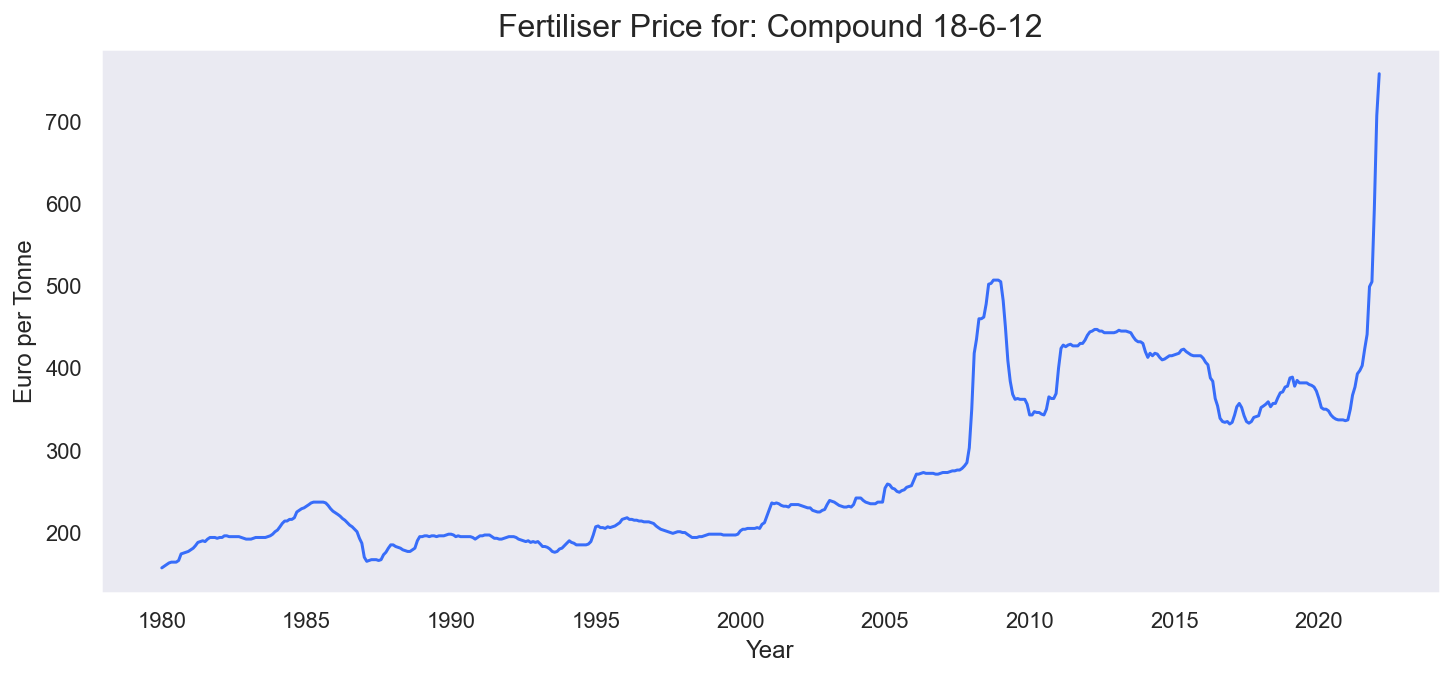

In [20]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(12, 5));  

# remove the grid on the chart
sns.set_style( {'axes.grid' : False})

# plotting month and IN, groupby if it is a bankholiday
sns.lineplot(data = df_com18612, x="Month", y="VALUE");

#plt.suptitle("Fertiliser Price for: Compound 15-3-20"); 
plt.title("Fertiliser Price for: Compound 18-6-12", fontsize = 16);

plt.ylabel('Euro per Tonne');
plt.xlabel('Year');

plt.show();

### Plot all charts
Plot a chart of each fertilizer type and check the price range for each tyep

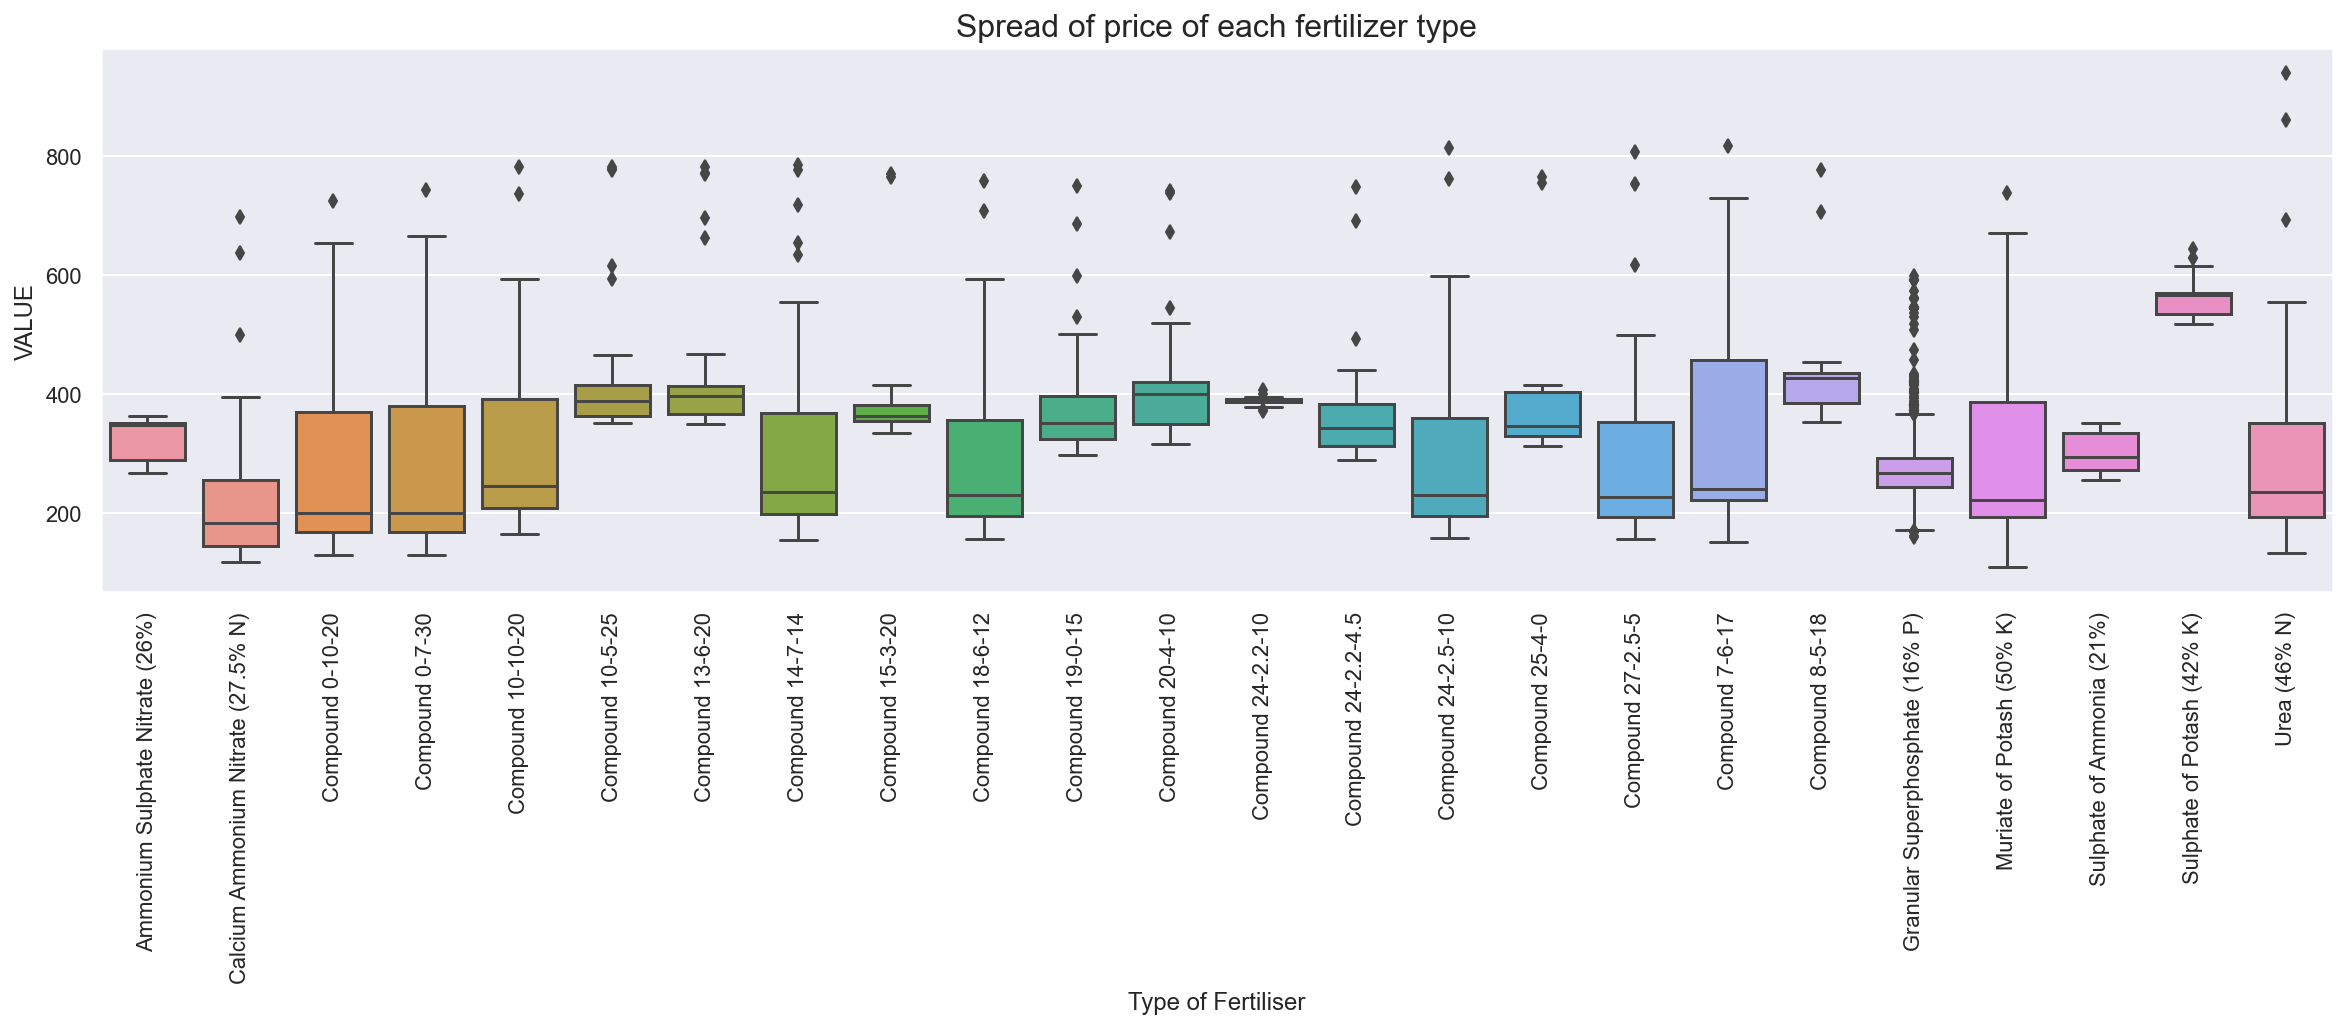

In [21]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(20, 5));  

# Type of fertilizer and Value   
ax = sns.boxplot(x="Type of Fertiliser", y="VALUE", data=df_fertiliser);

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);
plt.title("Spread of price of each fertilizer type", fontsize=16);

In [22]:
df_fertiliser.describe()

,VALUE,month,year
count,6557.000000,12144.000000,12144.000000
mean,288.982767,6.480237,2000.584980
std,114.851093,3.459763,12.172429
min,109.000000,1.000000,1980.000000
25%,196.000000,3.000000,1990.000000
50%,245.000000,6.000000,2001.000000
75%,378.000000,9.000000,2011.000000
max,939.000000,12.000000,2022.000000


In [23]:
#most common fertilizer is Ammonium Sulphate Nitrate (26%)

In [24]:
# summary statistics for each type of fertilizer
df_fertiliser.groupby(['Type of Fertiliser']).describe()

VALUE                                 \
                                    count        mean         std    min   
Type of Fertiliser                                                         
Ammonium Sulphate Nitrate (26%)      46.0  326.065217   34.413435  267.0   
Calcium Ammonium Nitrate (27.5% N)  506.0  208.049407   78.420241  118.0   
Compound 0-10-20                    506.0  259.806324  116.174885  130.0   
Compound 0-7-30                     506.0  261.557312  120.193251  129.0   
Compound 10-10-20                   506.0  297.075099  111.711768  165.0   
Compound 10-5-25                     71.0  409.464789   89.785750  351.0   
Compound 13-6-20                     58.0  418.862069  102.425574  349.0   
Compound 14-7-14                    506.0  282.065217  108.296740  155.0   
Compound 15-3-20                     64.0  380.140625   72.616599  334.0   
Compound 18-6-12                    506.0  274.326087  100.085025  157.0   
Compound 19-0-15                     98.0  366.724490   69.382368  298.0   
Compound 20-4-10                    134.0  394.470149   64.346885  316.0   
Compound 24-2.2-10                   13.0  387.923077    9.903379  371.0   
Compound 24-2.2-4.5                  98.0  353.806122   66.405760  289.0   
Compound 24-2.5-10                  506.0  276.719368  104.132590  158.0   
Compound 25-4-0                      91.0  367.263736   68.571590  313.0   
Compound 27-2.5-5                   506.0  271.610672  102.111881  156.0   
Compound 7-6-17                     256.0  321.562500  130.570107  151.0   
Compound 8-5-18                     100.0  421.370000   55.619133  353.0   
Granular Superphosphate (16% P)     387.0  296.284238   89.336888  160.0   
Muriate of Potash (50% K)           465.0  284.666667  130.097057  109.0   
Sulphate of Ammonia (21%)            62.0  302.403226   32.465598  255.0   
Sulphate of Potash (42% K)           60.0  558.350000   29.155239  517.0   
Urea (46% N)                        506.0  272.924901  102.092941  133.0   

                                                                  month  \
                                       25%    50%     75%    max  count   
Type of Fertiliser                                                        
Ammonium Sulphate Nitrate (26%)     289.00  348.5  352.00  363.0  506.0   
Calcium Ammonium Nitrate (27.5% N)  145.00  183.0  255.75  697.0  506.0   
Compound 0-10-20                    169.00  201.0  370.75  724.0  506.0   
Compound 0-7-30                     168.00  201.0  379.25  743.0  506.0   
Compound 10-10-20                   209.00  245.0  392.50  782.0  506.0   
Compound 10-5-25                    364.00  388.0  414.50  782.0  506.0   
Compound 13-6-20                    367.00  397.5  414.00  781.0  506.0   
Compound 14-7-14                    199.00  235.0  368.75  785.0  506.0   
Compound 15-3-20                    355.00  364.0  382.00  770.0  506.0   
Compound 18-6-12                    195.00  231.0  356.00  758.0  506.0   
Compound 19-0-15                    324.25  351.5  396.75  750.0  506.0   
Compound 20-4-10                    349.00  400.5  420.00  742.0  506.0   
Compound 24-2.2-10                  386.00  388.0  391.00  407.0  506.0   
Compound 24-2.2-4.5                 313.00  343.5  383.75  748.0  506.0   
Compound 24-2.5-10                  196.00  231.0  360.00  814.0  506.0   
Compound 25-4-0                     329.50  347.0  403.00  764.0  506.0   
Compound 27-2.5-5                   193.00  228.0  352.75  807.0  506.0   
Compound 7-6-17                     223.00  240.5  457.25  817.0  506.0   
Compound 8-5-18                     385.00  427.0  436.25  776.0  506.0   
Granular Superphosphate (16% P)     244.00  268.0  293.00  599.0  506.0   
Muriate of Potash (50% K)           194.00  223.0  387.00  738.0  506.0   
Sulphate of Ammonia (21%)           272.50  294.0  334.00  352.0  506.0   
Sulphate of Potash (42% K)          534.75  566.5  570.00  643.0  506.0   
Urea (46% N)                     

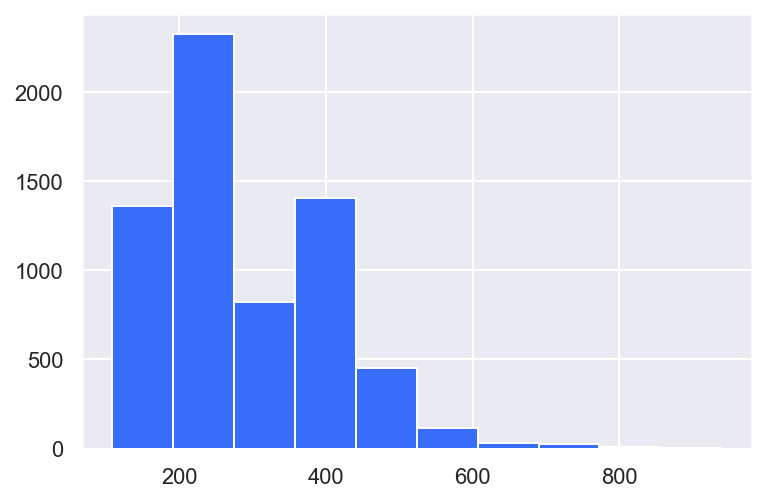

In [25]:
plt.hist(df_fertiliser['VALUE']);

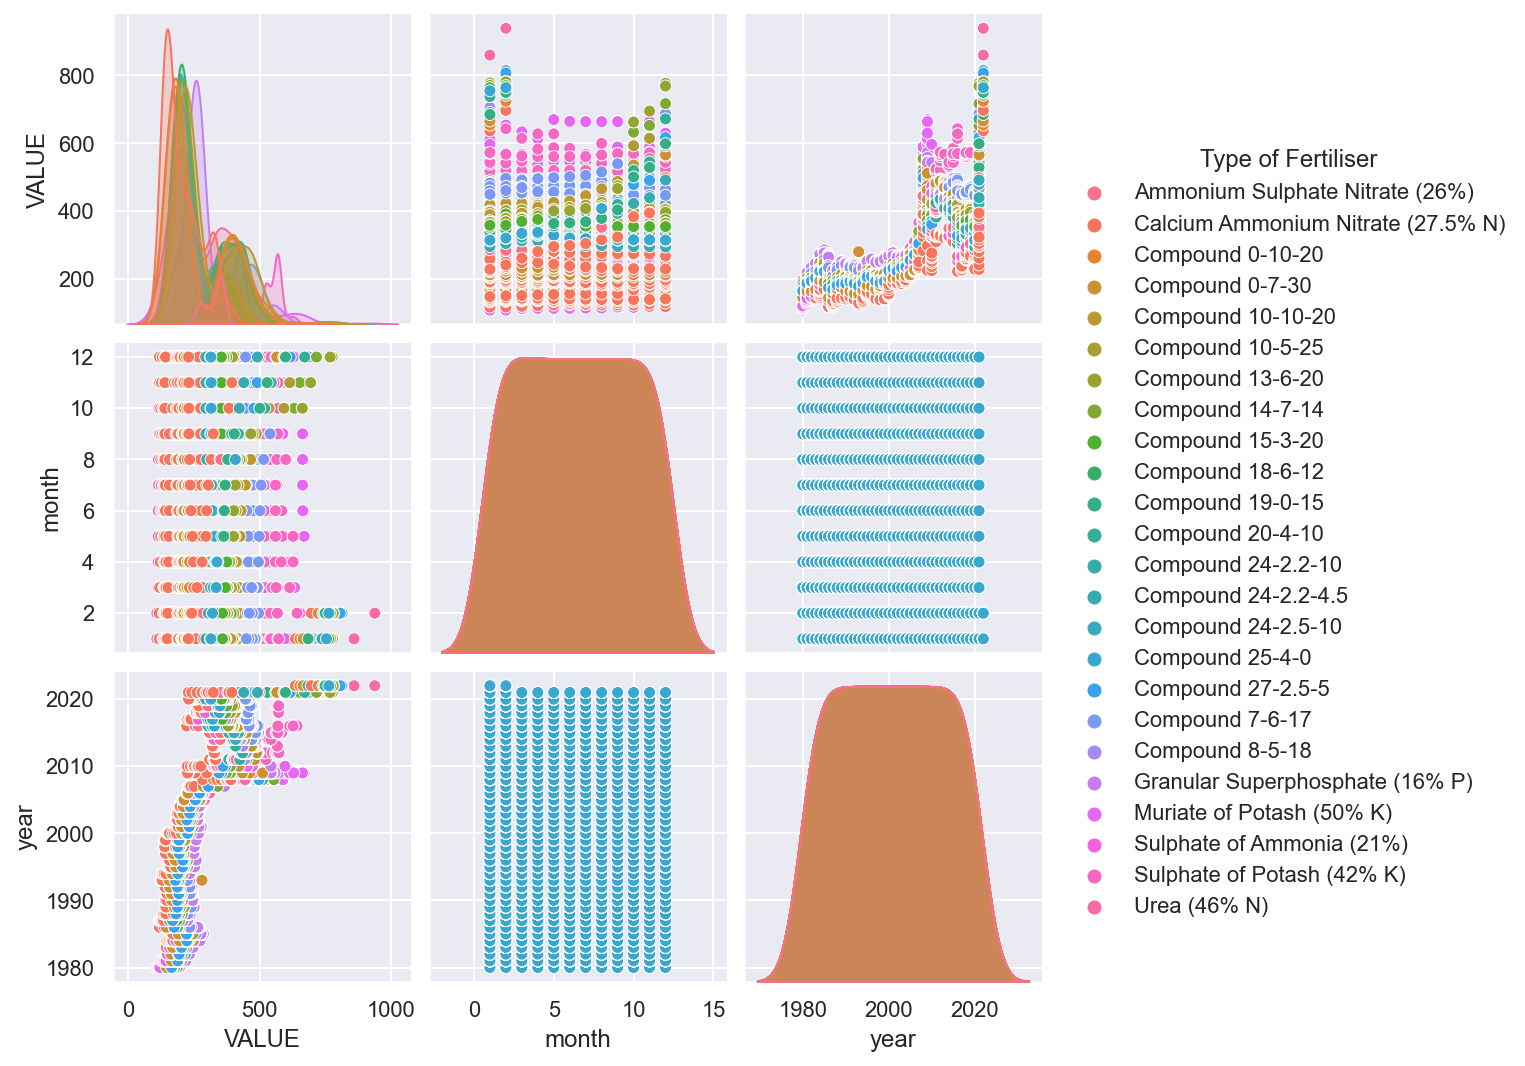

In [26]:
#pairplot
sns.pairplot(df_fertiliser, hue="Type of Fertiliser");

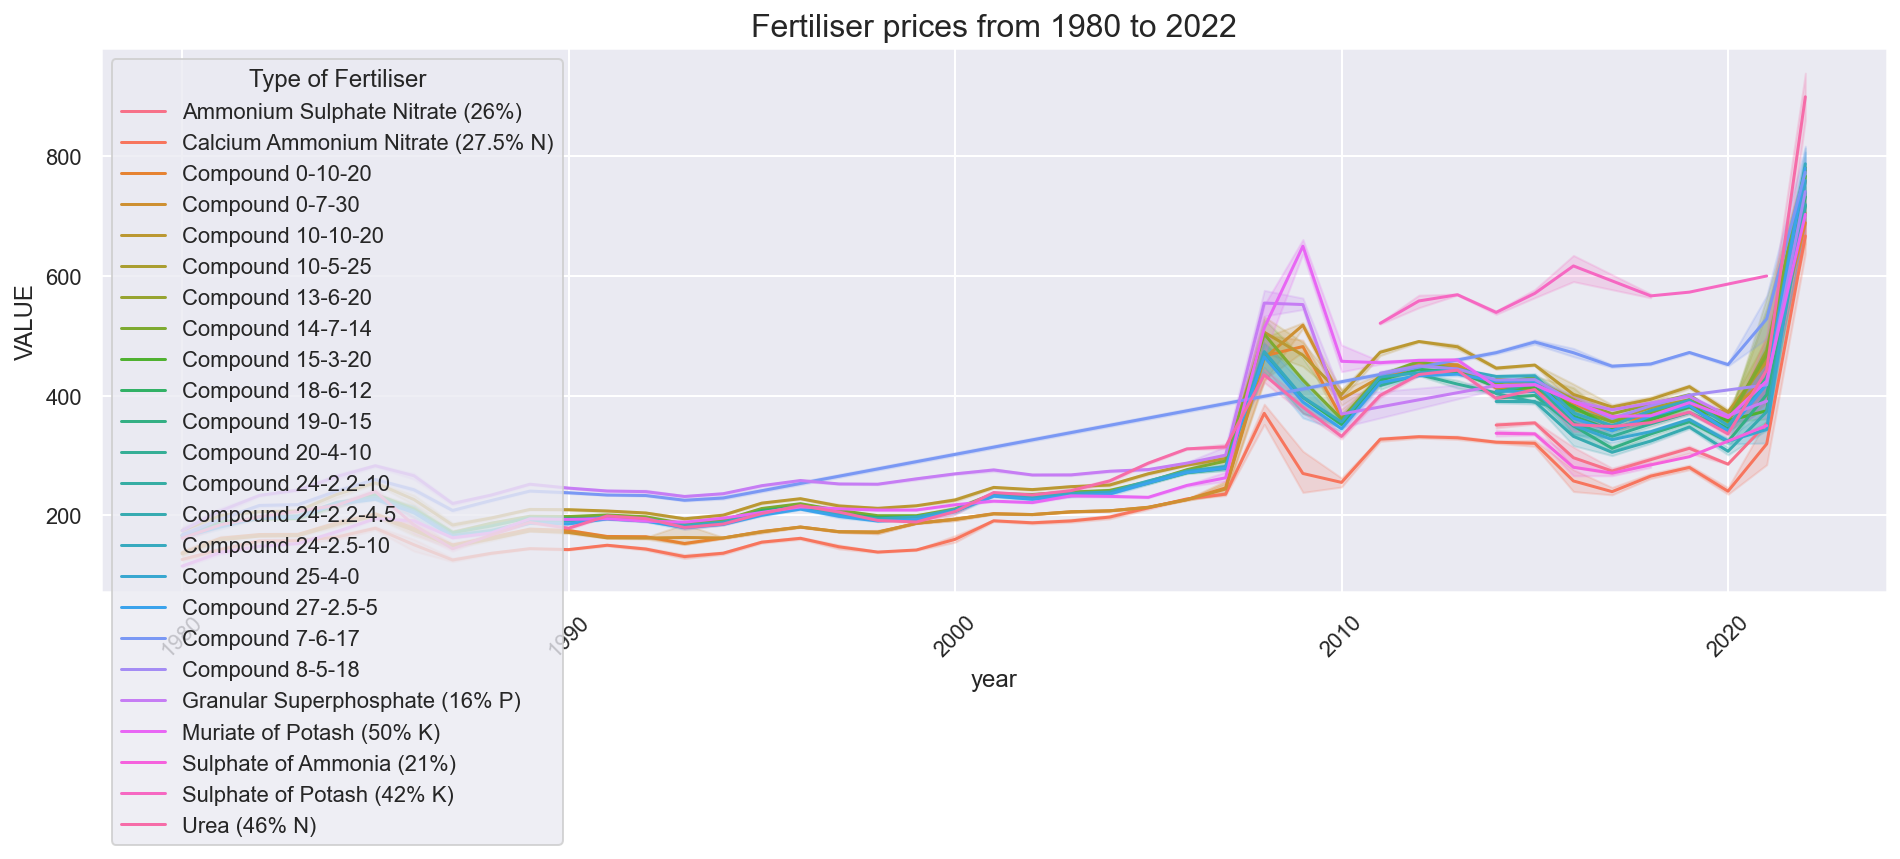

In [27]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(16, 5));  

sns.lineplot(x = 'year', y = 'VALUE', data = df_fertiliser, hue='Type of Fertiliser');

plt.title("Fertiliser prices from 1980 to 2022", fontsize = 16);

#rotate x-axis labels
plt.xticks(rotation=45);

Big upward trend in Prices in 2008 and again in 2022.

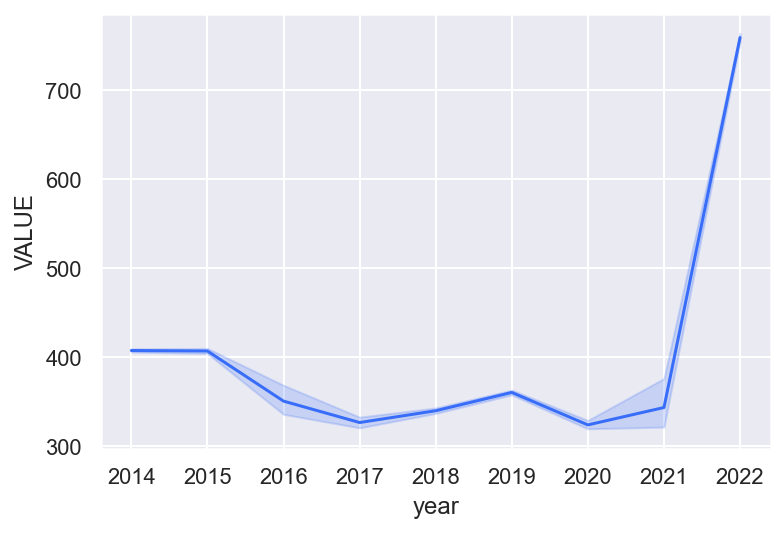

In [28]:
#looking at a specific variable
x_cat = df_fertiliser[df_fertiliser['Type of Fertiliser']=='Compound 25-4-0']
#x_cat
sns.lineplot(x = 'year', y ='VALUE', data = x_cat);

In [29]:
df_potassium

,Month,Price,Change
0,Mar 2002,128.46,-
1,Apr 2002,127.01,-1.13%
2,May 2002,122.69,-3.40%
3,Jun 2002,117.79,-3.99%
4,Jul 2002,113.40,-3.73%
...,...,...,...
236,Nov 2021,193.38,1.53%
237,Dec 2021,195.61,1.15%
238,Jan 2022,195.41,-0.10%
239,Feb 2022,345.41,76.76%


In [30]:
#phosphate
df_phosphate

,Month,Price,Change,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Oct 1998,27.45,-,NaN,NaN,NaN,NaN
1,Nov 1998,27.90,1.63%,NaN,NaN,NaN,NaN
2,Dec 1998,27.75,-0.55%,NaN,NaN,NaN,NaN
3,Jan 1999,28.00,0.92%,NaN,NaN,NaN,NaN
4,Feb 1999,36.70,31.08%,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
277,Nov 2021,133.99,5.40%,NaN,NaN,NaN,NaN
278,Dec 2021,156.38,16.70%,NaN,NaN,NaN,NaN
279,Jan 2022,153.08,-2.10%,NaN,NaN,NaN,NaN
280,Feb 2022,152.10,-0.65%,NaN,NaN,NaN,NaN


### Milk

In [31]:
#removing the M and replacing with the -
df_milk['Month'] = df_milk['Month'].str.replace("M", "-")

In [32]:
# date format
df_milk['Month'] = pd.to_datetime(df_milk['Month'], format='%Y-%m')

In [33]:
df_milk['month_year'] = pd.to_datetime(df_milk['Month']).dt.to_period('M')
df_milk['month'] = pd.DatetimeIndex(df_milk['Month']).month
df_milk['year'] = pd.DatetimeIndex(df_milk['Month']).year

In [34]:
df_milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   STATISTIC     412 non-null    object        
 1   Statistic     412 non-null    object        
 2   TLIST(M1)     412 non-null    int64         
 3   Month         412 non-null    datetime64[ns]
 4   C02136V02577  412 non-null    int64         
 5   Product       412 non-null    object        
 6   UNIT          412 non-null    object        
 7   VALUE         412 non-null    float64       
 8   month_year    412 non-null    period[M]     
 9   month         412 non-null    int64         
 10  year          412 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4), period[M](1)
memory usage: 35.5+ KB


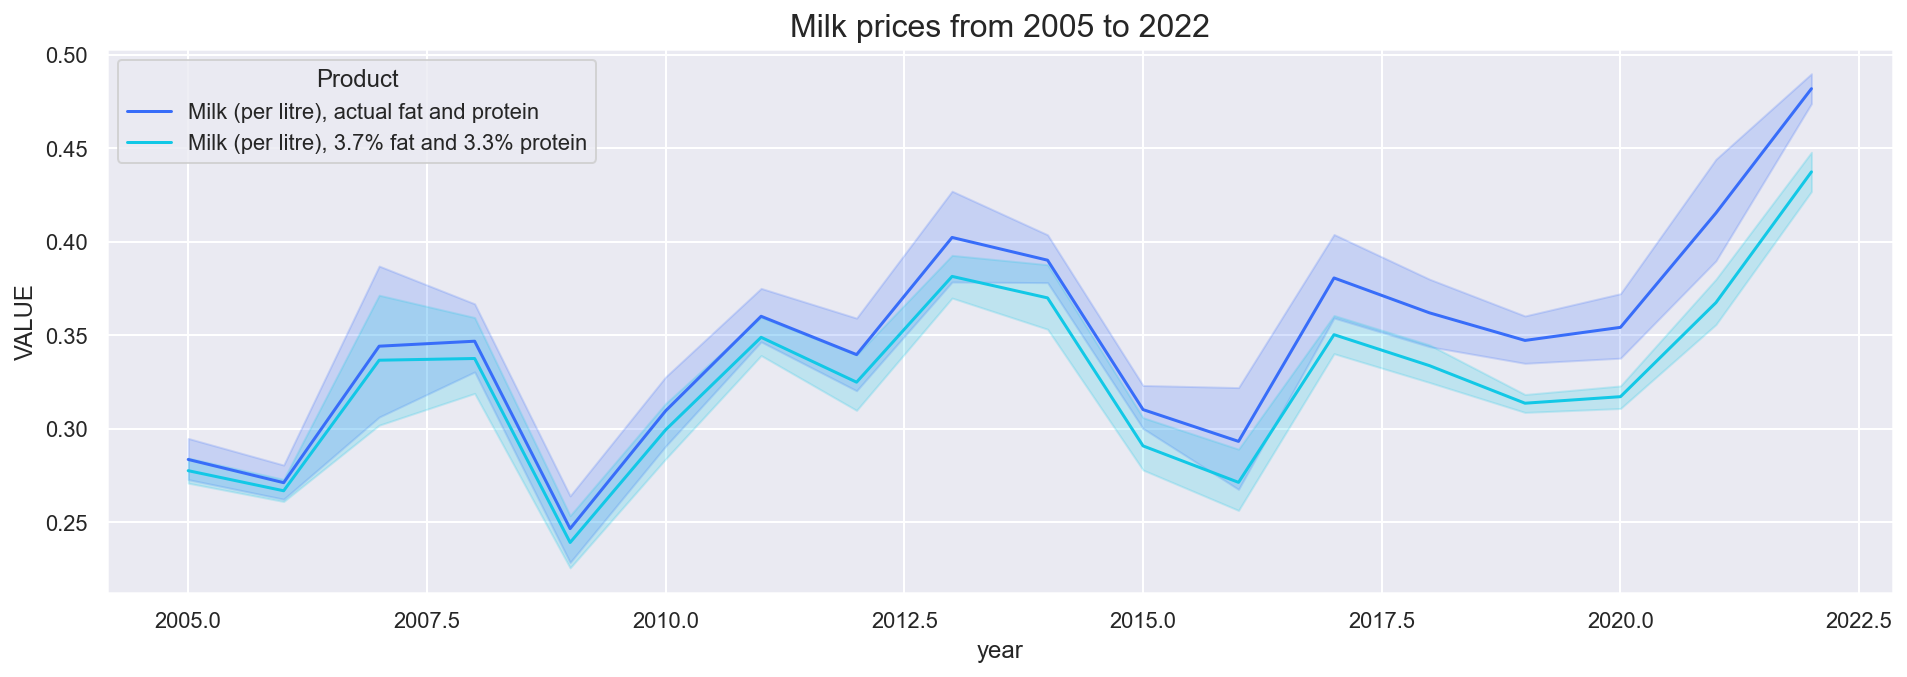

In [35]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(16, 5));  

sns.lineplot(x = 'year', y = 'VALUE', data = df_milk, hue='Product');

plt.title("Milk prices from 2005 to 2022", fontsize = 16);


### Consumption of inorganic fertilizers

Data of EU countries consumption of Nitrogen and Phosphorus from Eurostat.

https://ec.europa.eu/eurostat/databrowser/view/AEI_FM_USEFERT__custom_2575740/default/table?lang=en

In [36]:
df_consum_eu

,DATAFLOW,LAST UPDATE,freq,nutrient,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:AEI_FM_USEFERT(1.0),09/03/22 23:00:00,A,N,T,AL,2000,13943.0,NaN
1,ESTAT:AEI_FM_USEFERT(1.0),09/03/22 23:00:00,A,N,T,AL,2001,18131.0,NaN
2,ESTAT:AEI_FM_USEFERT(1.0),09/03/22 23:00:00,A,N,T,AL,2002,18187.0,NaN
3,ESTAT:AEI_FM_USEFERT(1.0),09/03/22 23:00:00,A,N,T,AL,2003,20028.0,NaN
4,ESTAT:AEI_FM_USEFERT(1.0),09/03/22 23:00:00,A,N,T,AL,2004,16511.0,NaN
...,...,...,...,...,...,...,...,...,...
4402,ESTAT:AEI_FM_USEFERT(1.0),09/03/22 23:00:00,A,P,T,UK,2015,85555.0,NaN
4403,ESTAT:AEI_FM_USEFERT(1.0),09/03/22 23:00:00,A,P,T,UK,2016,85989.0,NaN
4404,ESTAT:AEI_FM_USEFERT(1.0),09/03/22 23:00:00,A,P,T,UK,2017,85116.0,NaN
4405,ESTAT:AEI_FM_USEFERT(1.0),09/03/22 23:00:00,A,P,T,UK,2018,82060.0,NaN


In [37]:
# dataflow is not useful
# last update is not useful
# freq is only annual so not useful so removing 
df_consum_eu = df_consum_eu.drop(['DATAFLOW','LAST UPDATE', 'freq', 'OBS_FLAG'],  1)

In [38]:
# N represents Nitrogen
df_consum_eu['nutrient'] = df_consum_eu['nutrient'].replace({'N' : 'Nitrogen'}, regex=True)
# P represents Phosphorous
df_consum_eu['nutrient'] = df_consum_eu['nutrient'].replace({'P' : 'Phosphorus'}, regex=True)
# T represents Tonne
df_consum_eu['unit'] = df_consum_eu['unit'].replace({'T' : 'Tonne'}, regex=True)

In [39]:
# change fr
df_consum_eu.OBS_VALUE = df_consum_eu.OBS_VALUE.astype('Int64')
#
#df_consum_eu['TIME_PERIOD'] = pd.DatetimeIndex(df_consum_eu['TIME_PERIOD']).year

In [40]:
df_consum_eu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nutrient     4407 non-null   object
 1   unit         4407 non-null   object
 2   geo          4407 non-null   object
 3   TIME_PERIOD  4407 non-null   int64 
 4   OBS_VALUE    4406 non-null   Int64 
dtypes: Int64(1), int64(1), object(3)
memory usage: 176.6+ KB


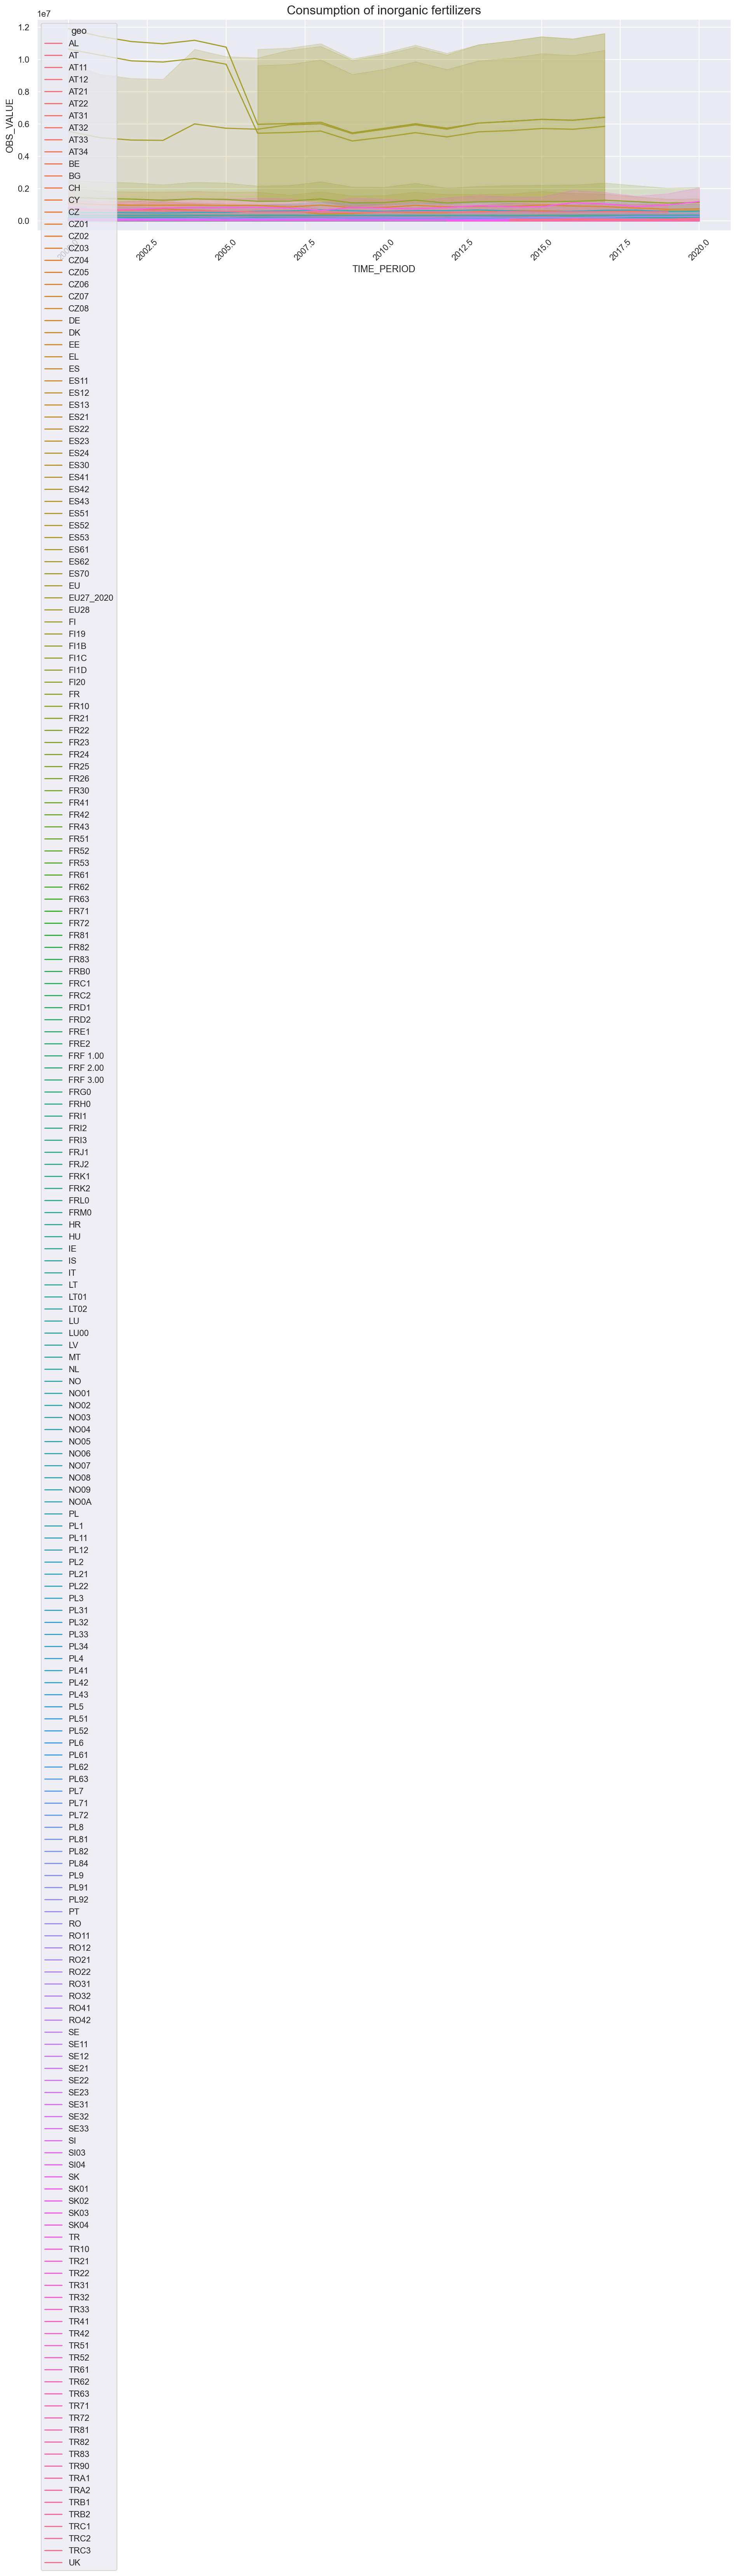

In [41]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(16, 5));  

sns.lineplot(x = 'TIME_PERIOD', y = 'OBS_VALUE', data = df_consum_eu, hue='geo');

plt.title("Consumption of inorganic fertilizers", fontsize = 16);

#rotate x-axis labels
plt.xticks(rotation=45);

# Sentiment analysis of tweets

In [42]:
df_tweets

,Unnamed: 0,Datetime,Tweet Id,Text
0,0,2022-04-29 11:08:37+00:00,1519997076754608129,@Rubberbandits Runs a hair transplant farm on ...
1,1,2022-04-29 10:08:22+00:00,1519981912281989121,"@Carol4OliveFarm Ah very sad , but how lucky w..."
2,2,2022-04-29 09:52:07+00:00,1519977823741566977,The creative team have worked with Glenilen Fa...
3,3,2022-04-29 09:51:53+00:00,1519977764845232129,Here's our national farm advisory service @tea...
4,4,2022-04-29 09:46:26+00:00,1519976392917757954,💩🚜 Spreading slurry on farms is a key grass gr...
...,...,...,...,...
996,996,2020-11-14 10:34:07+00:00,1327560437655801856,Up and at them delivering around Dublin but al...
997,997,2020-11-14 03:02:19+00:00,1327446736290320384,@Cernovich Yes so true. Although 1984 is very ...
998,998,2020-11-13 19:51:18+00:00,1327338267503714306,"38 Castle Farm, Shankill, Dublin 18 ⇨ €585,000..."
999,999,2020-11-13 13:28:24+00:00,1327241909761433600,Sign petition to stop puppy farms in Ireland #...


In [43]:
# convert to datetime
df_tweets['Datetime'] = pd.to_datetime(df_tweets['Datetime']).dt.date

In [44]:
# convert the date column to date format
df_tweets['Datetime'] = df_tweets['Datetime'].apply(pd.to_datetime)
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  1001 non-null   int64         
 1   Datetime    1001 non-null   datetime64[ns]
 2   Tweet Id    1001 non-null   int64         
 3   Text        1001 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 31.4+ KB


### Looking at twitter from 2022 only

In [45]:
df_tweets = df_tweets[(df_tweets['Datetime'] > "2022-01-01") & (df_tweets['Datetime'] < "2022-04-29")]


In [46]:
#get the word count of the tweet
df_tweets["word_count"] = df_tweets["Text"].apply(lambda x: len(str(x).split()))


In [47]:
#get the word count of the tweet
df_tweets["char_count"] = df_tweets["Text"].str.len()

### Natural Language processing

### Topic modelling
https://www.youtube.com/watch?v=NYkbqzTlW3w
https://www.youtube.com/watch?v=VraAbgAoYSk

In [48]:
#https://www.nltk.org/
import nltk #natural langugage toolkit

In [49]:
#download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ritaraher/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
from nltk.corpus import stopwords
#remove stopwords
stop = stopwords.words("english")

In [51]:
# counting stop words
#stop words
df_tweets["stopwords"]= df_tweets["Text"].apply(lambda x: len([x for x in x.split() if x in stop]))

In [52]:
#count hashtags
df_tweets["hashtag"]= df_tweets["Text"].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))

#clean the tweet removes the @username, not useful
df_tweets["tweet_clean"] = df_tweets["tweet_clean"].str.replace("@[^\s]+", "")

#remove numbers
df_tweets["tweet_clean"] = df_tweets["tweet_clean"].str.replace("\w*\d\w*", "")

#remove punctuation
import re

df_tweets["tweet_clean"] = df_tweets["tweet_clean"].str.replace('[^\w\s]','')

In [53]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    text = text.lower()                                              #lowercase
    text = re.sub('\[.*?\]', '', text)                               #remove the twitter handle
    text = re.sub('@[^\s]+', '', text)                               # remove text in square brackets
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # remove punctuation
    text = re.sub('\w*\d\w*', '', text)                              #remove words containing numbers
    text = re.sub('\n', '', text)                                    # remove \n
    return text

round1 = lambda x: clean_text_round1(x)

In [54]:
# Let's take a look at the updated text
df_tweets['tweet_clean'] = df_tweets.Text.apply(round1)
df_tweets

,Unnamed: 0,Datetime,Tweet Id,Text,word_count,char_count,stopwords,hashtag,tweet_clean
10,10,2022-04-28,1519824139606921222,My parents told me they found me on their fron...,46,276,19,4,my parents told me they found me on their fron...
11,11,2022-04-28,1519816948510384128,My parents told me they found me on their fron...,46,276,19,4,my parents told me they found me on their fron...
12,12,2022-04-28,1519773773720965124,@evannac ‘They say solar farms don’t give pupp...,25,129,9,0,‘they say solar farms don’t give puppies canc...
13,13,2022-04-28,1519750457522102272,I'm at Home Farm FC in Dublin https://t.co/V3l...,8,53,2,0,im at home farm fc in dublin
14,14,2022-04-28,1519736201745514499,In the 1980s a box of photographic plates cont...,38,233,15,0,in the a box of photographic plates containin...
...,...,...,...,...,...,...,...,...,...
332,332,2022-01-04,1478331488999460864,"136 Home Farm Road, Drumcondra, Dublin 3 ⇨ €75...",20,132,0,2,home farm road drumcondra dublin ⇨ € bed s...
333,333,2022-01-04,1478329397547614211,So good to be back! (@ Airfield Farm - @airfie...,13,90,3,0,so good to be back airfield farm in dublin
334,334,2022-01-03,1478059208390201349,@LynnsTootsie As puppy farms with their poor w...,35,209,12,0,as puppy farms with their poor welfare standa...
335,335,2022-01-03,1477944855322148865,@rtenews @cilliansherlock Germany has 179 offs...,30,222,11,0,germany has offshore wind farm projects of ...


In [55]:
#removing stop words from tweet clean
df_tweets["tweet_clean"]= df_tweets["tweet_clean"].apply(lambda x : " ".join(x for x in x.split() if x not in stop))

### Sentiment Analysis with TextBlob

In [56]:
##semantic analysis
from textblob import TextBlob
df_tweets["tweet_clean"][:5].apply(lambda x : TextBlob(x).sentiment)

#   (-0.5, 1.0)
# sentiment of being negative because of the -, subjective

10    (0.21428571428571427, 0.42857142857142855)
11    (0.21428571428571427, 0.42857142857142855)
12                     (0.5, 0.8888888888888888)
13                                    (0.0, 0.0)
14                                    (0.0, 0.0)
Name: tweet_clean, dtype: object

In [57]:
df_tweets["polarity"]= df_tweets["tweet_clean"].apply(lambda x : TextBlob(x).sentiment[0])

#   (-0.5, 1.0)
# sentiment of being negative because of the -, subjective

In [58]:
df_tweets["subjectivity"]= df_tweets["tweet_clean"].apply(lambda x : TextBlob(x).sentiment[1])

In [59]:
df_tweets

,Unnamed: 0,Datetime,Tweet Id,Text,word_count,char_count,stopwords,hashtag,tweet_clean,polarity,subjectivity
10,10,2022-04-28,1519824139606921222,My parents told me they found me on their fron...,46,276,19,4,parents told found front doorstep hardworking ...,0.214286,0.428571
11,11,2022-04-28,1519816948510384128,My parents told me they found me on their fron...,46,276,19,4,parents told found front doorstep hardworking ...,0.214286,0.428571
12,12,2022-04-28,1519773773720965124,@evannac ‘They say solar farms don’t give pupp...,25,129,9,0,‘they say solar farms don’t give puppies cance...,0.500000,0.888889
13,13,2022-04-28,1519750457522102272,I'm at Home Farm FC in Dublin https://t.co/V3l...,8,53,2,0,im home farm fc dublin,0.000000,0.000000
14,14,2022-04-28,1519736201745514499,In the 1980s a box of photographic plates cont...,38,233,15,0,box photographic plates containing images crea...,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
332,332,2022-01-04,1478331488999460864,"136 Home Farm Road, Drumcondra, Dublin 3 ⇨ €75...",20,132,0,2,home farm road drumcondra dublin ⇨ € bed semid...,0.000000,0.000000
333,333,2022-01-04,1478329397547614211,So good to be back! (@ Airfield Farm - @airfie...,13,90,3,0,good back airfield farm dublin,0.350000,0.300000
334,334,2022-01-03,1478059208390201349,@LynnsTootsie As puppy farms with their poor w...,35,209,12,0,puppy farms poor welfare standards restricted ...,-0.307143,0.478571
335,335,2022-01-03,1477944855322148865,@rtenews @cilliansherlock Germany has 179 offs...,30,222,11,0,germany offshore wind farm projects currently ...,0.200000,0.550000


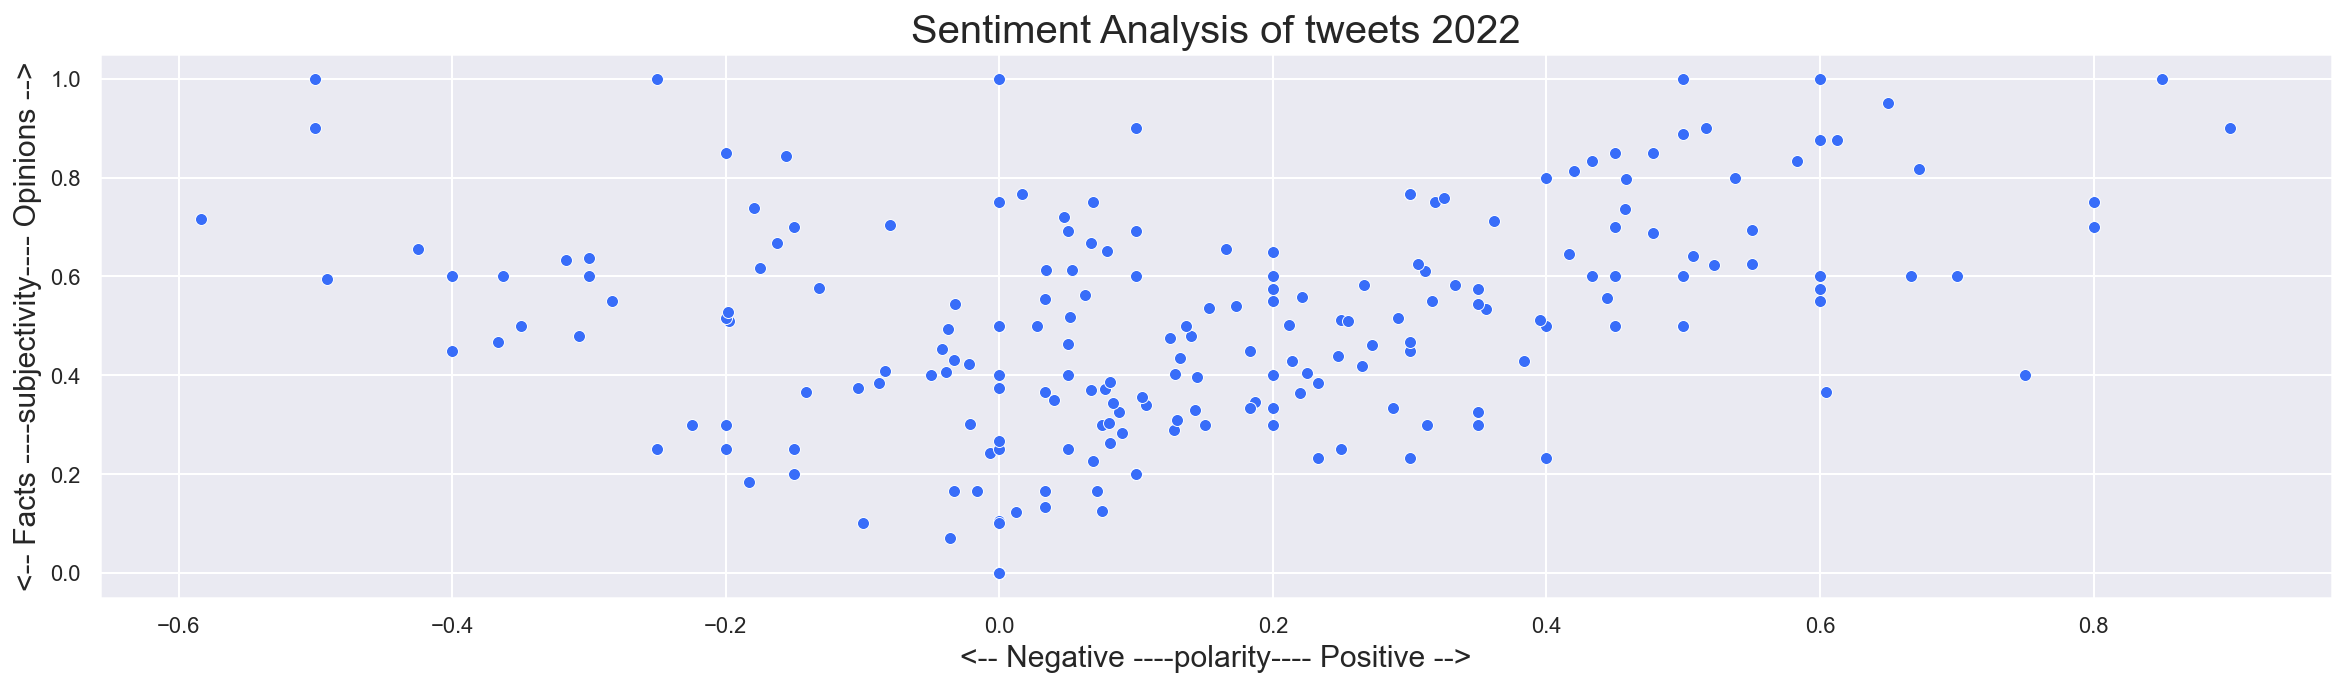

In [60]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(20, 5));  

sns.scatterplot(data=df_tweets, x="polarity", y="subjectivity")

plt.title("Sentiment Analysis of tweets 2022", fontsize=20);
plt.xlabel('<-- Negative ----polarity---- Positive -->', fontsize=15);
plt.ylabel('<-- Facts ----subjectivity---- Opinions -->', fontsize=15);

plt.show();

### Document term matrix

https://analyticsindiamag.com/a-guide-to-term-document-matrix-with-its-implementation-in-r-and-python/

In [61]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words="english")
data_cv = cv.fit_transform(df_tweets['tweet_clean'])
data_dtm =pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())

# Pickle it for later use
import pickle
pickle.dump(cv, open("../data/cv_stop.pkl", "wb"))

data_dtm

,abbotstown,able,abomination,absence,access,accessories,according,account,acidity,acre,...,york,yorkfrom,youd,young,youngest,youtubers,youve,yum,ón,ørsted
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
#Gensism Python framework for fast Vector Space Modelling
from gensim import matutils, models
#ndustrial-strength Natural Language Processing (NLP) in Python
import scipy.sparse

In [63]:
### Topic modelling

In [65]:
# One of the required inputs is a term-document matrix
data_dtm = data_dtm.transpose()
data_dtm.head()

,0,1,2,3,4,5,6,7,8,9,...,317,318,319,320,321,322,323,324,325,326
abbotstown,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abomination,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
absence,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
access,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# turn term matrix into a sparse matrix
sparse_counts = scipy.sparse.csr_matrix(data_dtm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [67]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
#cv = pickle.load(open("../data/cv_stop.pkl", "rb"))

In [68]:
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [69]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.036*"farm" + 0.010*"amp" + 0.008*"farms" + 0.007*"dublin" + 0.006*"wind" + 0.005*"bed" + 0.004*"house" + 0.003*"home" + 0.003*"great" + 0.003*"need"'),
 (1,
  '0.039*"farm" + 0.009*"amp" + 0.008*"farms" + 0.004*"farmers" + 0.004*"irish" + 0.004*"market" + 0.004*"wind" + 0.003*"today" + 0.003*"family" + 0.003*"like"')]

In [70]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.044*"farm" + 0.010*"farms" + 0.009*"dublin" + 0.006*"bed" + 0.005*"farmers" + 0.005*"wind" + 0.004*"large" + 0.004*"home" + 0.004*"told" + 0.004*"good"'),
 (1,
  '0.034*"farm" + 0.008*"amp" + 0.007*"farms" + 0.006*"market" + 0.005*"like" + 0.005*"today" + 0.005*"killruddery" + 0.004*"great" + 0.004*"irish" + 0.003*"bray"'),
 (2,
  '0.033*"farm" + 0.019*"amp" + 0.007*"farms" + 0.006*"wind" + 0.005*"irish" + 0.004*"food" + 0.004*"family" + 0.003*"farmers" + 0.003*"land" + 0.003*"house"')]

In [71]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.032*"farm" + 0.005*"day" + 0.004*"farmers" + 0.004*"animal" + 0.004*"people" + 0.003*"farms" + 0.003*"uk" + 0.003*"make" + 0.003*"need" + 0.003*"year"'),
 (1,
  '0.045*"farm" + 0.017*"amp" + 0.011*"dublin" + 0.007*"farms" + 0.006*"ireland" + 0.006*"bed" + 0.005*"house" + 0.005*"great" + 0.004*"new" + 0.004*"food"'),
 (2,
  '0.038*"farm" + 0.011*"amp" + 0.009*"farms" + 0.009*"wind" + 0.006*"market" + 0.005*"today" + 0.005*"irish" + 0.005*"killruddery" + 0.004*"richard" + 0.004*"bray"'),
 (3,
  '0.030*"farm" + 0.011*"farms" + 0.007*"farmers" + 0.005*"parents" + 0.005*"large" + 0.005*"wind" + 0.005*"told" + 0.005*"dad" + 0.005*"door" + 0.005*"amreading"')]

### Topic Modeling - Attempt #2 (Nouns Only)

In [72]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [73]:
# Apply the nouns function to the transcripts to filter only on nouns
df_tweets['data_nouns'] = pd.DataFrame(df_tweets.tweet_clean.apply(nouns))
df_tweets

,Unnamed: 0,Datetime,Tweet Id,Text,word_count,char_count,stopwords,hashtag,tweet_clean,polarity,subjectivity,data_nouns
10,10,2022-04-28,1519824139606921222,My parents told me they found me on their fron...,46,276,19,4,parents told found front doorstep hardworking ...,0.214286,0.428571,parents farmers farm mom take lunch dad fields...
11,11,2022-04-28,1519816948510384128,My parents told me they found me on their fron...,46,276,19,4,parents told found front doorstep hardworking ...,0.214286,0.428571,parents farmers farm mom take lunch dad fields...
12,12,2022-04-28,1519773773720965124,@evannac ‘They say solar farms don’t give pupp...,25,129,9,0,‘they say solar farms don’t give puppies cance...,0.500000,0.888889,farms t puppies cancer studio meme ’ 🤦‍♂️
13,13,2022-04-28,1519750457522102272,I'm at Home Farm FC in Dublin https://t.co/V3l...,8,53,2,0,im home farm fc dublin,0.000000,0.000000,im home farm fc dublin
14,14,2022-04-28,1519736201745514499,In the 1980s a box of photographic plates cont...,38,233,15,0,box photographic plates containing images crea...,0.000000,0.000000,box plates images women farm images gender amp...
...,...,...,...,...,...,...,...,...,...,...,...,...
332,332,2022-01-04,1478331488999460864,"136 Home Farm Road, Drumcondra, Dublin 3 ⇨ €75...",20,132,0,2,home farm road drumcondra dublin ⇨ € bed semid...,0.000000,0.000000,home farm road drumcondra dublin ⇨ € house dub...
333,333,2022-01-04,1478329397547614211,So good to be back! (@ Airfield Farm - @airfie...,13,90,3,0,good back airfield farm dublin,0.350000,0.300000,farm dublin
334,334,2022-01-03,1478059208390201349,@LynnsTootsie As puppy farms with their poor w...,35,209,12,0,puppy farms poor welfare standards restricted ...,-0.307143,0.478571,farms welfare standards gene pool lack sociali...
335,335,2022-01-03,1477944855322148865,@rtenews @cilliansherlock Germany has 179 offs...,30,222,11,0,germany offshore wind farm projects currently ...,0.200000,0.550000,germany farm projects days use coalelectricity...


In [74]:
df_tweets.data_nouns

10     parents farmers farm mom take lunch dad fields...
11     parents farmers farm mom take lunch dad fields...
12             farms t puppies cancer studio meme ’ 🤦‍♂️
13                                im home farm fc dublin
14     box plates images women farm images gender amp...
                             ...                        
332    home farm road drumcondra dublin ⇨ € house dub...
333                                          farm dublin
334    farms welfare standards gene pool lack sociali...
335    germany farm projects days use coalelectricity...
336    abomination street city random bohreen farm na...
Name: data_nouns, Length: 327, dtype: object

In [92]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said', 'farm', 'farms', 'amp', 'farmers']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(df_tweets.data_nouns)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())

data_dtmn

,abomination,access,accessories,account,acidity,acres,action,activities,actor,ad,...,wouldnt,yard,year,years,yes,yesterday,york,youd,youtubers,ón
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [94]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.013*"dublin" + 0.009*"house" + 0.006*"food" + 0.006*"home" + 0.005*"family" + 0.005*"road" + 0.005*"leopardstown" + 0.005*"today" + 0.004*"lusk" + 0.003*"clay"'),
 (1,
  '0.009*"wind" + 0.008*"ireland" + 0.007*"market" + 0.006*"today" + 0.006*"day" + 0.005*"parents" + 0.005*"killruddery" + 0.005*"years" + 0.005*"use" + 0.005*"energy"')]

In [95]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.018*"dublin" + 0.009*"wind" + 0.008*"ireland" + 0.006*"house" + 0.006*"use" + 0.006*"leopardstown" + 0.005*"day" + 0.005*"years" + 0.005*"lots" + 0.005*"home"'),
 (1,
  '0.011*"family" + 0.011*"market" + 0.008*"killruddery" + 0.007*"food" + 0.006*"house" + 0.006*"parents" + 0.006*"dad" + 0.006*"literature" + 0.006*"fields" + 0.006*"fiction"'),
 (2,
  '0.009*"today" + 0.005*"wind" + 0.005*"women" + 0.005*"house" + 0.004*"bot" + 0.004*"state" + 0.004*"richard" + 0.004*"minister" + 0.004*"road" + 0.004*"day"')]

In [96]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.021*"dublin" + 0.015*"today" + 0.013*"market" + 0.013*"house" + 0.009*"killruddery" + 0.009*"family" + 0.007*"years" + 0.007*"ireland" + 0.007*"food" + 0.006*"energy"'),
 (1,
  '0.010*"dad" + 0.009*"parents" + 0.009*"fields" + 0.009*"fiction" + 0.009*"lunch" + 0.009*"literature" + 0.009*"mom" + 0.007*"food" + 0.006*"house" + 0.005*"animals"'),
 (2,
  '0.009*"wind" + 0.007*"home" + 0.005*"day" + 0.005*"power" + 0.005*"ireland" + 0.005*"years" + 0.004*"chocolate" + 0.004*"richard" + 0.004*"lot" + 0.004*"road"'),
 (3,
  '0.009*"leopardstown" + 0.007*"use" + 0.006*"clay" + 0.005*"dublin" + 0.005*"road" + 0.005*"year" + 0.005*"lots" + 0.005*"electricity" + 0.005*"sale" + 0.005*"work"')]

### Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [97]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [98]:
# Apply the nouns function to the transcripts to filter only on nouns
df_tweets['data_nouns_adj'] = pd.DataFrame(df_tweets.tweet_clean.apply(nouns_adj))

In [99]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(df_tweets.data_nouns_adj)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())

data_dtmna

,abbotstown,able,abomination,access,accessories,account,acidity,acre,acres,action,...,years,yes,yesterday,york,youd,young,youngest,youtubers,youve,ón
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())


In [101]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.007*"irish" + 0.006*"dublin" + 0.005*"new" + 0.005*"food" + 0.005*"large" + 0.004*"parents" + 0.004*"dad" + 0.004*"door" + 0.004*"fiction" + 0.004*"doorstep"'),
 (1,
  '0.008*"wind" + 0.007*"today" + 0.006*"dublin" + 0.006*"house" + 0.005*"market" + 0.005*"great" + 0.004*"ireland" + 0.004*"lots" + 0.004*"killruddery" + 0.004*"good"')]

In [102]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.012*"dublin" + 0.007*"wind" + 0.007*"house" + 0.006*"great" + 0.004*"energy" + 0.004*"home" + 0.004*"new" + 0.004*"use" + 0.004*"solar" + 0.004*"lusk"'),
 (1,
  '0.008*"irish" + 0.007*"good" + 0.005*"day" + 0.005*"food" + 0.004*"lots" + 0.004*"years" + 0.004*"animal" + 0.003*"dairy" + 0.003*"eu" + 0.003*"dublin"'),
 (2,
  '0.008*"market" + 0.007*"today" + 0.007*"large" + 0.006*"killruddery" + 0.006*"parents" + 0.005*"old" + 0.005*"ireland" + 0.005*"family" + 0.005*"dad" + 0.005*"door"')]

In [103]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.009*"food" + 0.007*"local" + 0.006*"good" + 0.005*"great" + 0.005*"wind" + 0.005*"new" + 0.004*"today" + 0.004*"dublin" + 0.004*"business" + 0.004*"organic"'),
 (1,
  '0.019*"dublin" + 0.008*"large" + 0.008*"parents" + 0.007*"house" + 0.007*"ireland" + 0.007*"leopardstown" + 0.007*"dad" + 0.007*"door" + 0.007*"doorstep" + 0.007*"fields"'),
 (2,
  '0.008*"wind" + 0.008*"irish" + 0.007*"energy" + 0.006*"old" + 0.005*"years" + 0.005*"family" + 0.005*"richard" + 0.005*"electricity" + 0.005*"solar" + 0.005*"state"'),
 (3,
  '0.010*"market" + 0.009*"today" + 0.009*"killruddery" + 0.007*"house" + 0.006*"day" + 0.006*"great" + 0.005*"open" + 0.005*"bray" + 0.004*"new" + 0.004*"lots"')]

### Identify Topics in Each Document

In [104]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

[(0,
  '0.006*"new" + 0.006*"eu" + 0.004*"ireland" + 0.004*"monkstown" + 0.004*"wonder" + 0.004*"solar" + 0.003*"country" + 0.003*"dairy" + 0.003*"state" + 0.003*"law"'),
 (1,
  '0.009*"dublin" + 0.009*"good" + 0.006*"food" + 0.006*"leopardstown" + 0.006*"today" + 0.006*"cheese" + 0.006*"lots" + 0.005*"solar" + 0.005*"year" + 0.005*"wind"'),
 (2,
  '0.011*"dublin" + 0.010*"market" + 0.010*"house" + 0.008*"killruddery" + 0.007*"old" + 0.006*"today" + 0.005*"wind" + 0.005*"family" + 0.005*"ireland" + 0.005*"lusk"'),
 (3,
  '0.008*"large" + 0.008*"day" + 0.007*"door" + 0.007*"irish" + 0.006*"parents" + 0.006*"dad" + 0.006*"stu" + 0.006*"bookbubble" + 0.006*"mom" + 0.006*"duncan"')]